<a href="https://colab.research.google.com/github/rg-smith/remote_sensing_course/blob/main/SNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get files from github page

In [70]:
!git clone https://github.com/rg-smith/remote_sensing_course.git

Cloning into 'remote_sensing_course'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


Load packages that we will be using

In [2]:
import matplotlib.image as img
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

Load original image

In [66]:
field=img.imread('remote_sensing_course/football_field.jpg',format='JPG')

Make function to add noise to the raster

In [67]:
def add_noise(raster,standard_deviation):
  noise=np.random.normal(0,standard_deviation,raster.shape)
  shift=np.max(raster)/2
  raster=raster-shift # shift the raster so it's centered at 0
  raster=raster+noise # add noise to the raster
  raster=raster+shift # shift the raster back to original
  raster=raster-np.min(raster);raster=raster/np.max(raster) # scale raster from 0 to 1
  return(raster)


Add noise to the image (normal distribution)

In [68]:
field=field[1::2,1::2,:]
field_noisy=add_noise(field,100)

Set default plot size

In [42]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['figure.dpi'] = 100

Plot the original and the noisy image

Text(0.5, 1.0, 'noisy image')

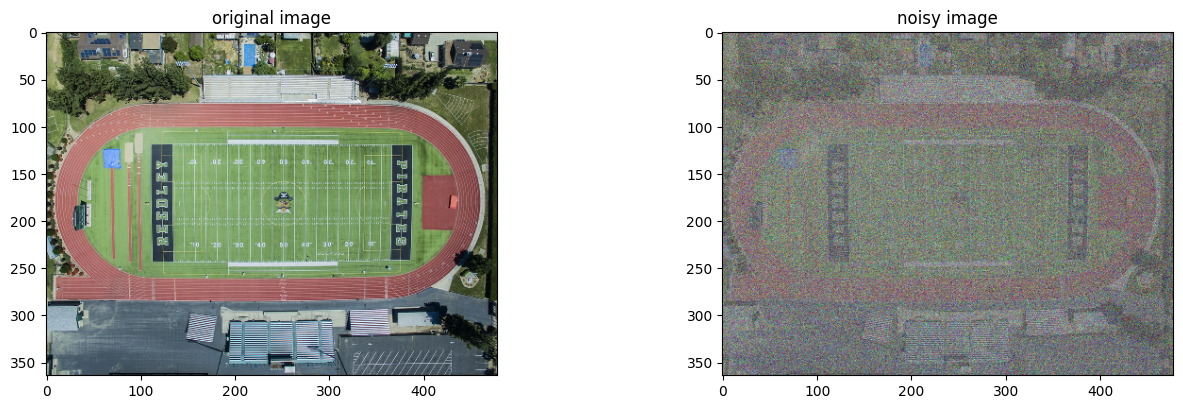

In [69]:
plt.figure();
plt.subplot(2,2,1)
plt.imshow(field);plt.title('original image')
plt.subplot(2,2,2);
plt.imshow(field_noisy);plt.title('noisy image')

Define function to average neighboring pixels

In [57]:
def multilook(raster,looks):
    for kk in range(raster.shape[2]):
        raster[:,:,kk]=ndimage.generic_filter(np.squeeze(raster[:,:,kk]), np.nanmean, size=looks, mode='constant', cval=np.NaN)
        raster[:,:,kk]=raster[:,:,kk]-np.nanmin(raster[:,:,kk])
        raster[:,:,kk]=raster[:,:,kk]/np.nanmax(raster[:,:,kk])
    #raster=raster[0::looks,0::looks,:]
    return(raster)

Average and plot the smoothed image

Text(0.5, 1.0, 'image with noise and smoothing')

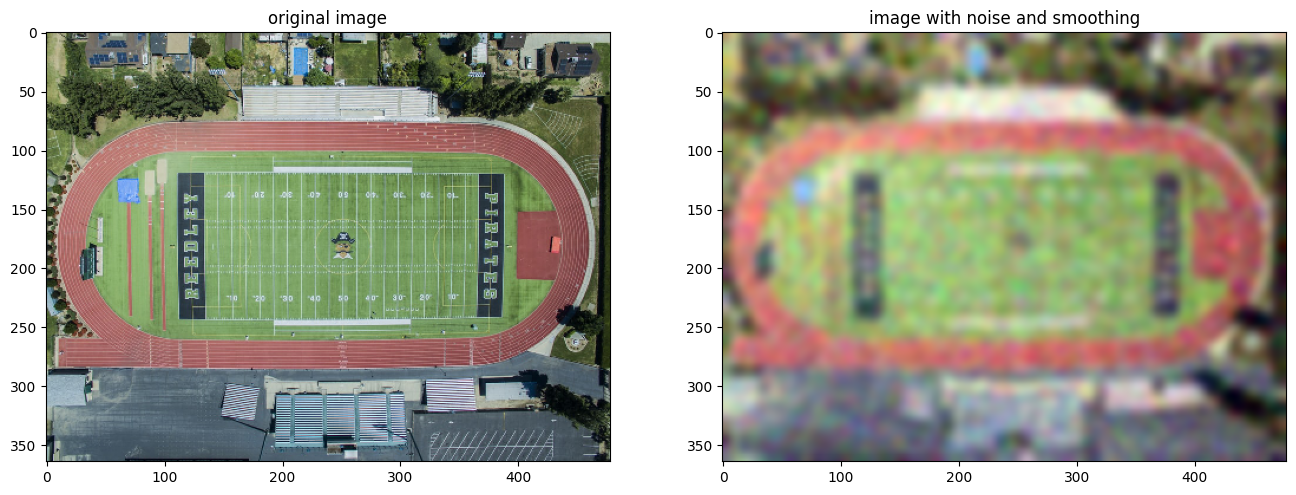

In [60]:
field_multilook=multilook(field_noisy,11)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(field);plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(field_multilook);plt.title('image with noise and smoothing')
